$$ |\kappa_{\pm}| = |\frac{1}{2\pi} \oint ds \kappa_s(s) \sqrt{\beta_x(s)\beta_y(s)} e^{i (\phi_x\pm\phi_y-(Q_x \pm Q_y - q\pm)2\pi s/C)}|$$

where ks is the normalized gradient of the skew quadrupole (in units of m-2), $\phi_{x,y} = \frac{1}{\beta_{x,y}(s)}$ the horizontal and vertical betatron phase, C is the circumference, ßx,y are the uned beta functions

LOCO, AT version


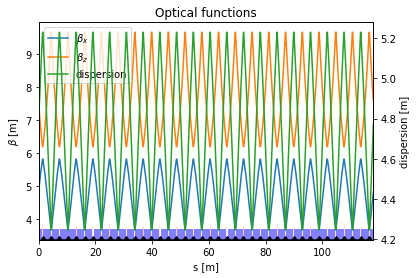

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
print(f"LOCO, AT version")

from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
from Lattice import *
ring=at.Lattice(ring2, energy=1)

ring.radiation_off()
ring.plot_beta()

In [2]:
t0_fullCode = time.time()

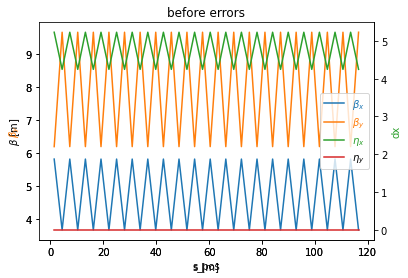

In [3]:
BPMs_random_noise = 0.0
twiss = getOptics(ring, elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

In [4]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(1, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  40
Number of used Correctors:  40
Execution time choose correctors: 0.0008399486541748047 sec


In [5]:
eta_xx, eta_yy= eta(ring)
print(shape(eta_xx))
print(eta_yy)

(301,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 1 #use all quads individually
used_qfqd_families, used_qfqd_families_ind = used_quadrpoles(ring, steps)
used_qs_families, used_qs_families_ind = used_skew(ring, steps)

used_quadrpoles_families_ind = used_qs_families_ind+used_qfqd_families_ind



t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QF: 20 # of QD: 20
used_quadrpoles_families_ind:  40
# of QS: 10
used_qs_families_ind:  10
Execution time chose quadrpoles: 0.0024061203002929688 sec


In [7]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x_eta(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y_eta(1.e-4, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 0.9193441867828369 sec
orm dimensions:  (42, 40)
0.0
112.00324008777744
301302.4175035986
301247.009337184


In [8]:
dk =1.e-04

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse_eta(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, used_correctors)

t1 = time.time()
print(f"Execution time: {t1-t0} sec")

generating response to family  1
Execution time: 0.9325058460235596 sec
generating response to family  2
Execution time: 0.975203275680542 sec
generating response to family  3
Execution time: 0.9525847434997559 sec
generating response to family  4
Execution time: 0.9125356674194336 sec
generating response to family  5
Execution time: 0.9201388359069824 sec
generating response to family  6
Execution time: 0.9093432426452637 sec
generating response to family  7
Execution time: 0.8847603797912598 sec
generating response to family  8
Execution time: 0.8758318424224854 sec
generating response to family  9
Execution time: 0.8716347217559814 sec
generating response to family  10
Execution time: 0.8677680492401123 sec
generating response to family  11
Execution time: 0.8706424236297607 sec
generating response to family  12
Execution time: 0.8894879817962646 sec
generating response to family  13
Execution time: 0.8660593032836914 sec
generating response to family  14
Execution time: 0.868676424

In [9]:
for i in used_qs_families_ind:
    for j in i:
        ring[j].K = 0.05

In [10]:
gradErr = 1.e-3
simulateRandomGradientErrors(ring, gradErr, used_qfqd_families_ind)
simulateAlignmentErrors(ring, 1.e-5, used_qfqd_families_ind)

In [11]:
# DRM (dispersion responce matrix)

eta_xx_err1, eta_yy_err1 = eta(ring)

print(shape(eta_yy_err1))
print(eta_yy_err1)

(301,)
[-0.10422464 -0.0840104  -0.0840104  -0.08245546 -0.08245546 -0.08135185
 -0.08201442 -0.08398978 -0.10966953 -0.13534928 -0.13534928 -0.13732465
 -0.13732465 -0.13805948 -0.13755158 -0.13094886 -0.12434613 -0.12434613
 -0.12383823 -0.12383823 -0.12401046 -0.12486313 -0.12571581 -0.13680058
 -0.14788535 -0.14788535 -0.14873802 -0.14873802 -0.14825119 -0.1464263
 -0.12270272 -0.09897914 -0.09897914 -0.09715425 -0.09715425 -0.09586045
 -0.09622093 -0.09770623 -0.11701505 -0.13632388 -0.13632388 -0.13780917
 -0.13780917 -0.13805076 -0.13704792 -0.12401103 -0.11097413 -0.11097413
 -0.10997129 -0.10997129 -0.10957229 -0.10977641 -0.10998052 -0.112634
 -0.11528748 -0.11528748 -0.11549159 -0.11549159 -0.11465773 -0.11278839
 -0.08848697 -0.06418555 -0.06418555 -0.06231621 -0.06231621 -0.06078692
 -0.06117913 -0.06315227 -0.08880319 -0.1144541  -0.1144541  -0.11642725
 -0.11642725 -0.11734811 -0.11721393 -0.11546958 -0.11372522 -0.11372522
 -0.11359104 -0.11359104 -0.11408243 -0.1152002

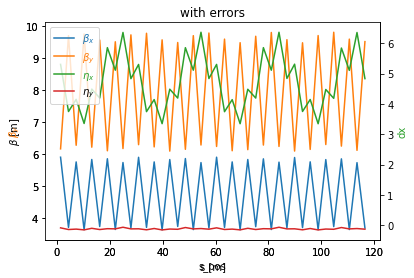

In [12]:
twiss_err = getOptics(ring, elements.Monitor, BPMs_random_noise ) #####
make_plot_all2(twiss_err, 'with errors')

Text(0, 0.5, '$\\Delta K[m^-2]$')

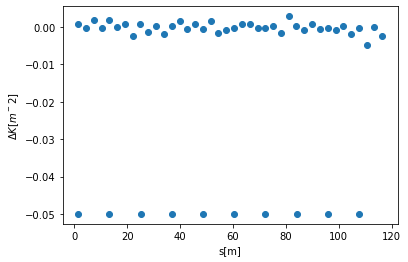

In [13]:
#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
twissq = getOptics(ring, elements.Quadrupole, BPMs_random_noise )
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twissq.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

In [14]:
bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_err)

RMS beta beat, x:1.0458171030642773%   y: 1.166873808396017%
STD beta beat, x:1.0455651978131357%   y: 1.1664721722940963%


In [15]:
Cxx11, Cxy11= ORM_x_eta(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy11, Cyx11= ORM_y_eta(1.e-4, ring, BPMs_random_noise, used_correctors)

In [16]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x_eta(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y_eta(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    dk = len(dCx)
    cut = 50
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x_eta(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y_eta(1.e-4, ring, BPMs_random_noise,  used_correctors)


    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:1.0458171030642773%   y: 1.166873808396017%
STD beta beat, x:1.0455651978131357%   y: 1.1664721722940963%
beta beating after corrections
RMS beta beat, x:0.618760413700933%   y: 1.1818233620060792%
STD beta beat, x:0.6187549493255204%   y: 1.1815507749866694%
betax_correction reduction 40.8347394694593
betax_correction reduction -1.281162838903005
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:15.606981798239017%   y: 11.681217170165805%
STD Dispersion, x:15.606957099259224%   y: 2.2375417562518396%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:2.9519527746026375%   y: 0.7282652305923345%
STD Dispersion, x:2.951894048880492%   y: 0.7282506465935497%
x_dispersion_correction reduction 81.08569092496978
y_dispersion_correction reduction 93.76550217341779
_________________________________
Coupling_parameters before correction:
Coupling Coefficients (driving term for s

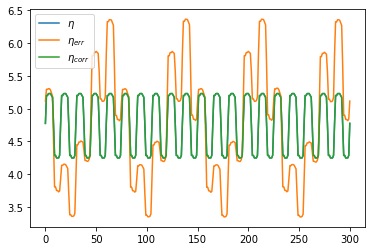

In [17]:
compare_drm(eta_xx, eta_xx_err1, eta_xx_corr)

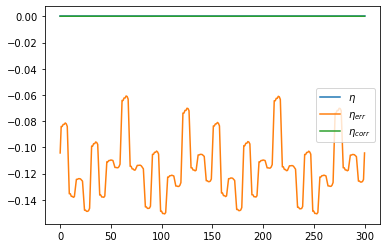

In [18]:
compare_drm(eta_yy, eta_yy_err1, eta_yy_corr)

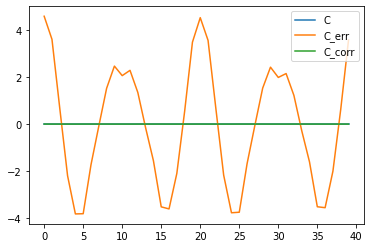

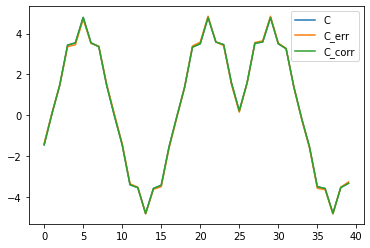

In [19]:
compare_orm(C0xy, Cxy11, Cxy2,25)
compare_orm(C0yx, Cyx11, Cyx2,25)

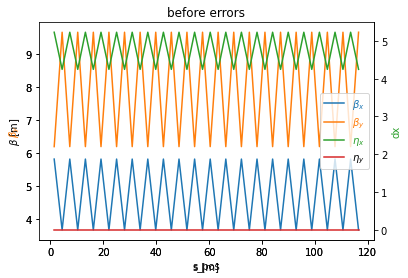

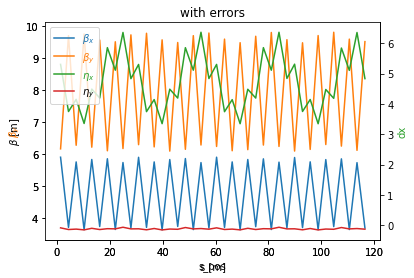

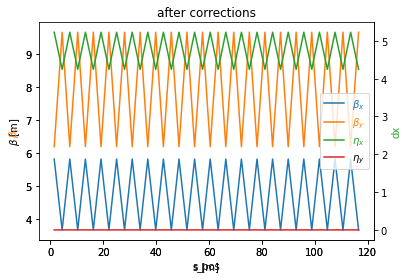

In [20]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corrected, 'after corrections')

In [21]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 60.42764687538147 sec
